In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,15)

In [36]:
df1 = pd.read_csv("253802batting.csv")
df2 = pd.read_csv("219889batting.csv")

In [37]:
df1 = df1.drop('Unnamed: 0',1)
df2 = df2.drop('Unnamed: 0',1)

In [38]:
maLong  = df1['runs'].rolling(window = 15, center = False).mean()
maShort = df1['runs'].rolling(window = 4, center = False).mean()

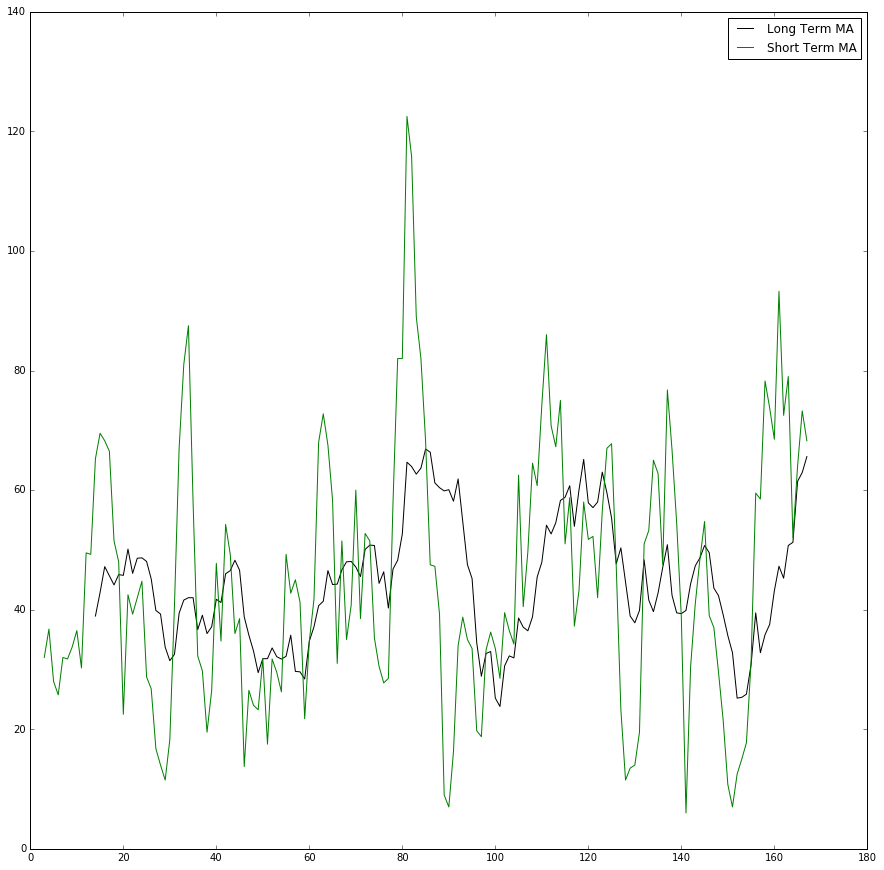

In [39]:
#plt.plot(df1['runs'], color= 'c')
plt.plot(df1['runs'].rolling(window=15,center=False).mean(),color = 'k', label =  'Long Term MA')
plt.plot(df1['runs'].rolling(window=4,center=False).mean(), color= 'g', label = 'Short Term MA')

#plt.plot(df2['runs'].rolling(window=6,center=False).mean(), color= 'c')
plt.legend()
plt.show()


In [40]:
maLong[49]

29.466666666666665

In [41]:
print(df1['runs'].mean())
sp = 0 
snp = 0
playCnt = 0
noplayCnt = 0
x = 15
while( x <= 160):
    #print(x)
    if(maLong[x]  < maShort[x]):
        if(maLong[x+1] > maShort[x+1]):
            print 'no play at' , x
            print df1['runs'][x+1] , df1['runs'][x+2], df1['runs'][x+3] 
            #print(x)
            snp  = snp +  df1['runs'][x+1] + df1['runs'][x+2] + df1['runs'][x+3] 
            noplayCnt = noplayCnt+3
            print('\n')
            
    if(maLong[x]  > maShort[x]):
        if(maLong[x+1] < maShort[x+1]):
            print 'play at' ,x
            print df1['runs'][x+1] , df1['runs'][x+2], df1['runs'][x+3] 
            sp  =  sp + df1['runs'][x+1] + df1['runs'][x+2] + df1['runs'][x+3] 
            playCnt = playCnt+3
            #print(x)
            print('\n')
        
    x = x+1
    

45.0595238095
no play at 19
0 82 18


play at 30
118 105 64


no play at 35
2 54 22


play at 39
87 2 100


no play at 40
2 100 8


play at 41
100 8 34


no play at 43
34 12 1


play at 54
94 55 9


no play at 58
16 107 37


play at 59
107 37 112


no play at 65
3 117 20


play at 66
117 20 23


no play at 67
20 23 80


play at 69
80 31 77


no play at 70
31 77 18


play at 71
77 18 15


no play at 73
15 12 66


play at 77
133 108 66


no play at 85
23 0 6


play at 97
58 43 11


no play at 114
19 31 0


play at 123
48 5 0


no play at 125
0 40 1


play at 131
127 22 49


no play at 139
3 8 107


play at 144
33 44 38


no play at 145
44 38 3


play at 154
77 138 7




In [45]:
print(sp, playCnt, snp, noplayCnt)

(2497, 42, 1300, 42)


In [46]:
print(sp/playCnt)

59


In [47]:
print(snp/noplayCnt)

30


In [48]:
overallAvg = df1['runs'].mean()
#average over the next 3 innings after positive or 'BUY' signal
playAvg = sp/playCnt
#average over the next 3 innings after negative or 'SELL' signal
noPlayAvg = snp/noplayCnt

print 'Career average: ', overallAvg
print 'Positive Signal average: ', playAvg
print 'Negative Signal average: ', noPlayAvg


Career average:  45.0595238095
Positive Signal average:  59
Negative Signal average:  30
